In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime 
from salishsea_tools import viz_tools
import cmocean
%matplotlib inline

In [2]:
plt.style.use('/ocean/vdo/MEOPAR/biomodelevalpaper/bioModelEvalPaper.mplstyle')

In [47]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [9]:
coarseu = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/13apr18/SalishSea_1h_20180413_20180416_grid_U.nc')
coarsev = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/13apr18/SalishSea_1h_20180413_20180416_grid_V.nc')
HS1u = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/13apr18/1_SalishSea_1h_20180413_20180416_grid_U.nc')
HS1v = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/13apr18/1_SalishSea_1h_20180413_20180416_grid_V.nc')
mesh_mask = nc.Dataset('/data/vdo/MEOPAR/grid/mesh_mask201702.nc')
HS1mask = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/13apr18/1_mesh_mask.nc')

In [10]:
grid = nc.Dataset('/data/vdo/MEOPAR/grid/bathymetry_201702.nc')

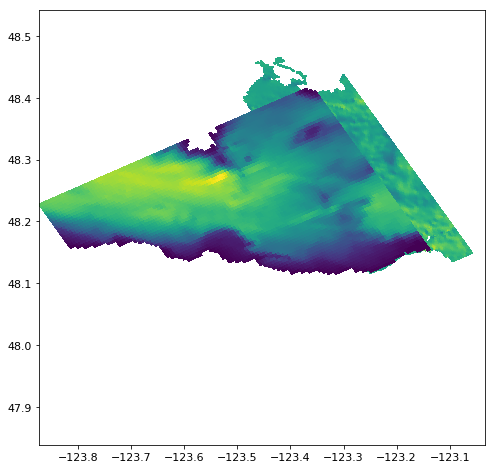

In [47]:
fig, ax = plt.subplots(figsize = (8,8))
ax.pcolormesh(HS1mask.variables['glamu'][0, :300, :100],
             HS1mask.variables['gphiu'][0, :300, :100],
             np.ma.masked_array(HS1u.variables['vozocrtx'][0,0,:300,:100], 
                mask = 1 - HS1mask.variables['umask'][0,0,:300,:100]))
ax.pcolormesh(grid.variables['nav_lon'][201:300, 100:200], grid.variables['nav_lat'][201:300,100:200],
                        grid.variables['Bathymetry'][201:300, 100:200])

# April 14 - 15, 2018

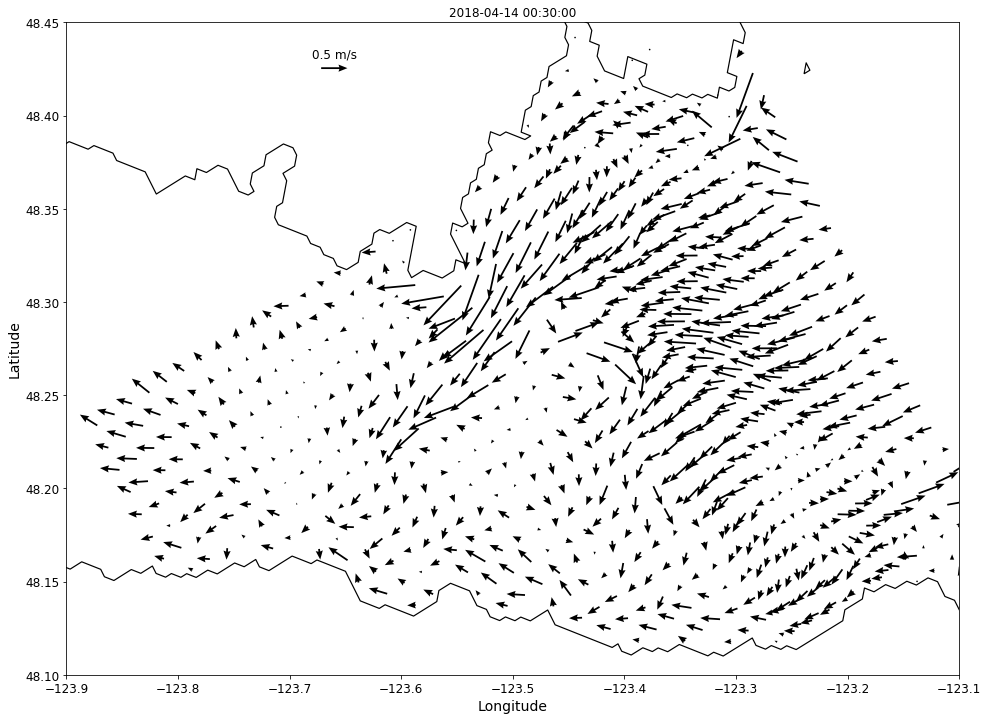

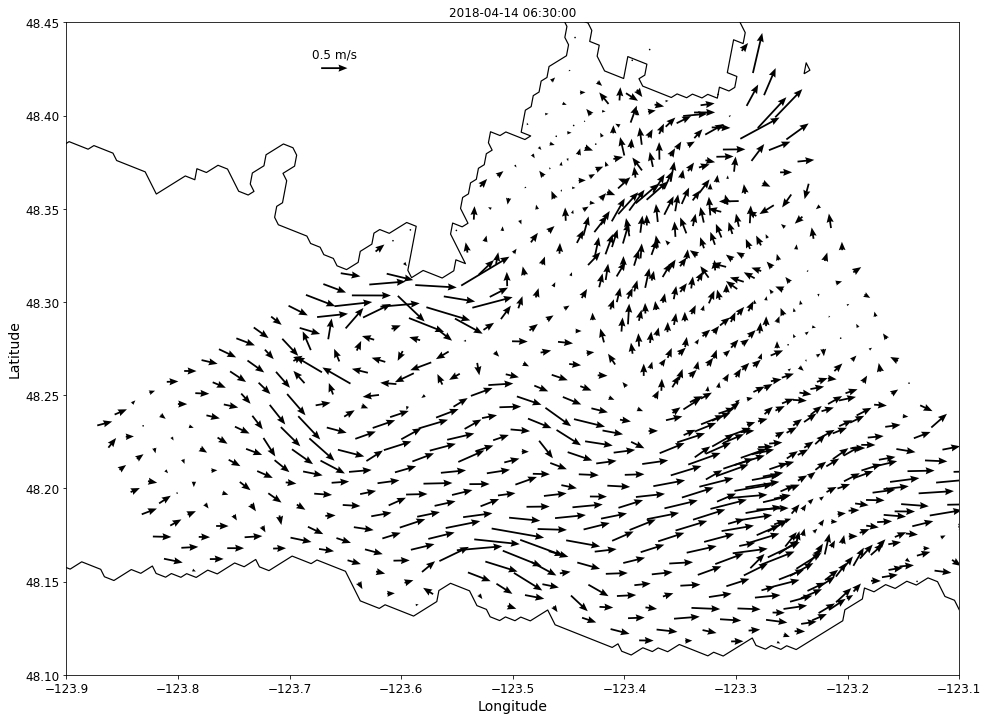

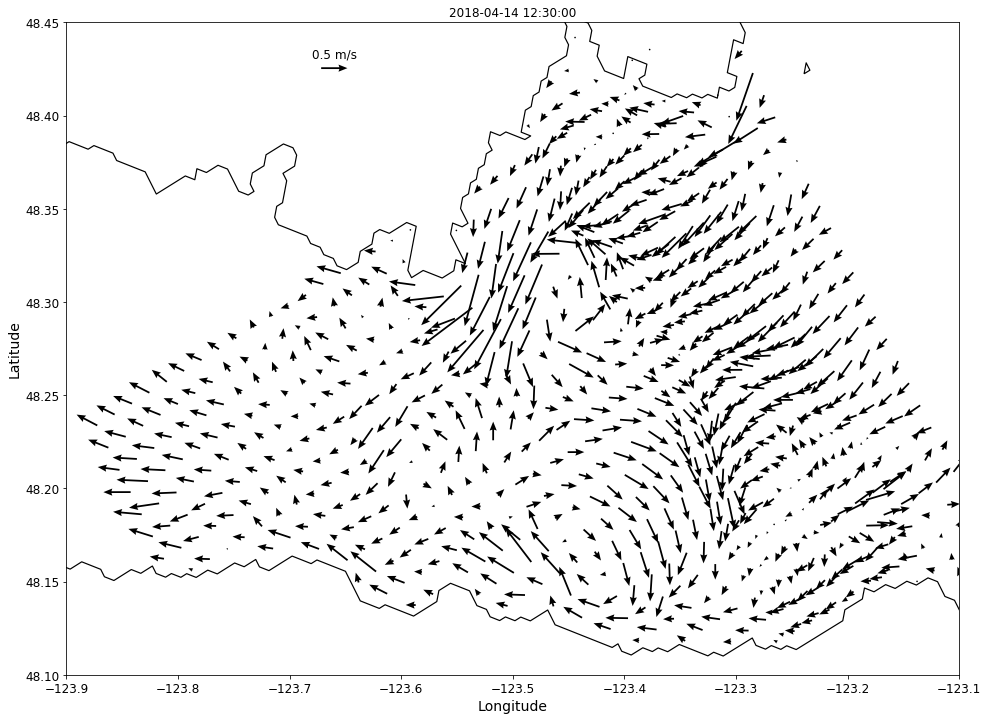

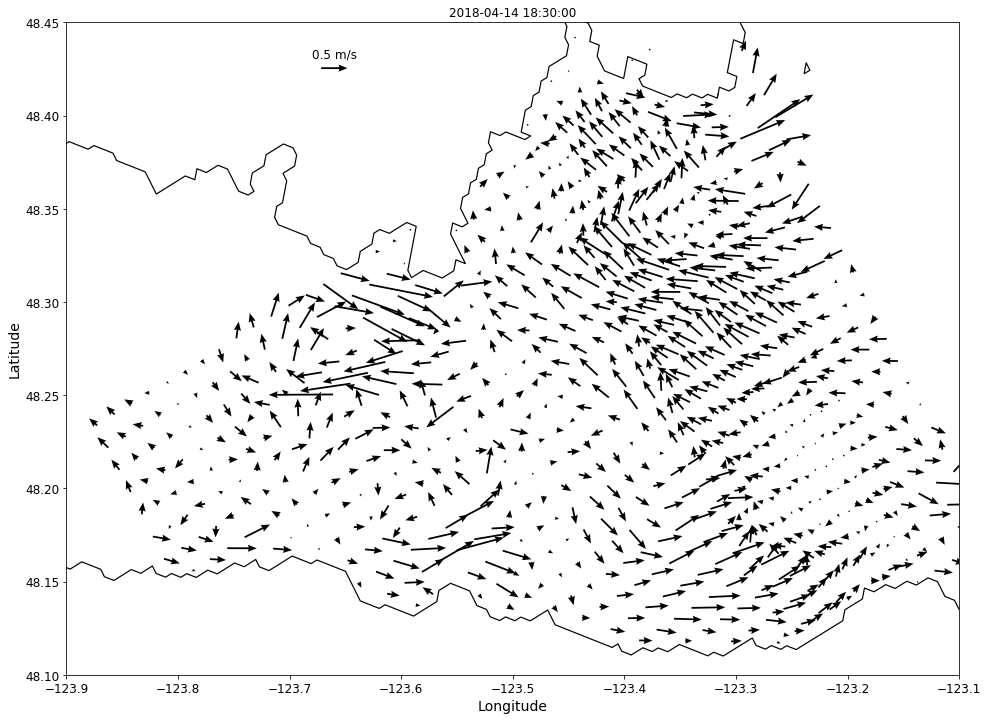

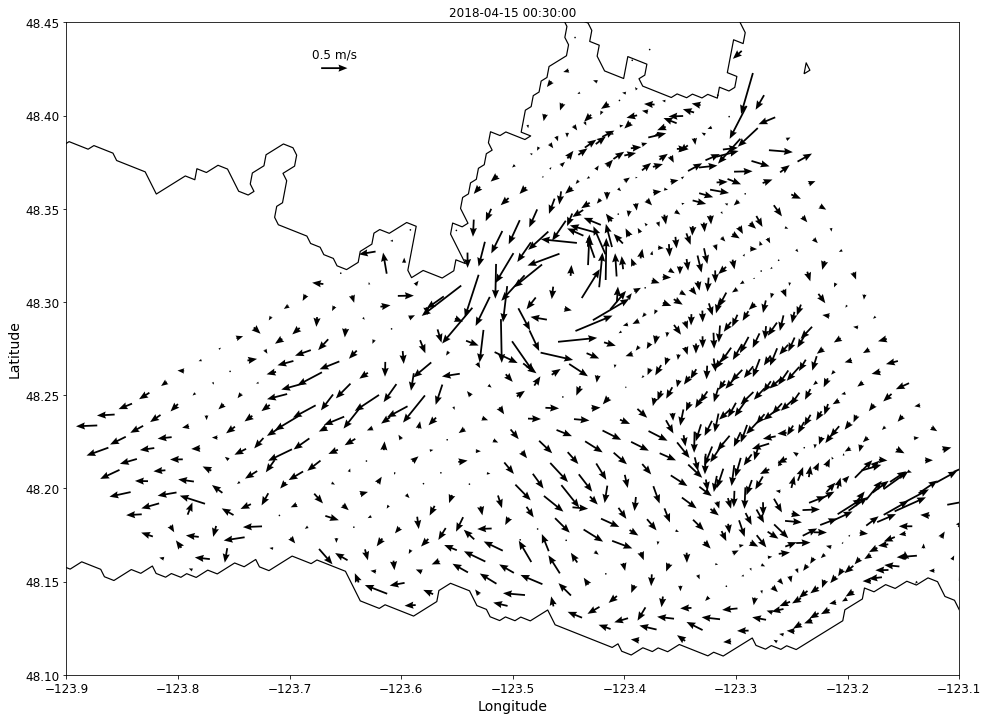

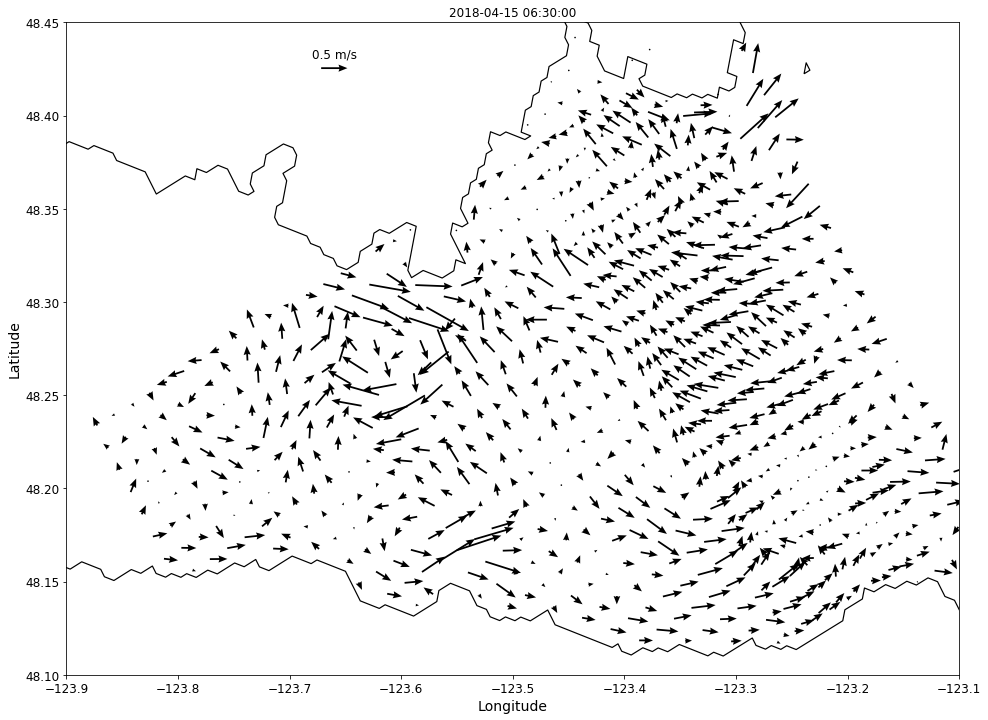

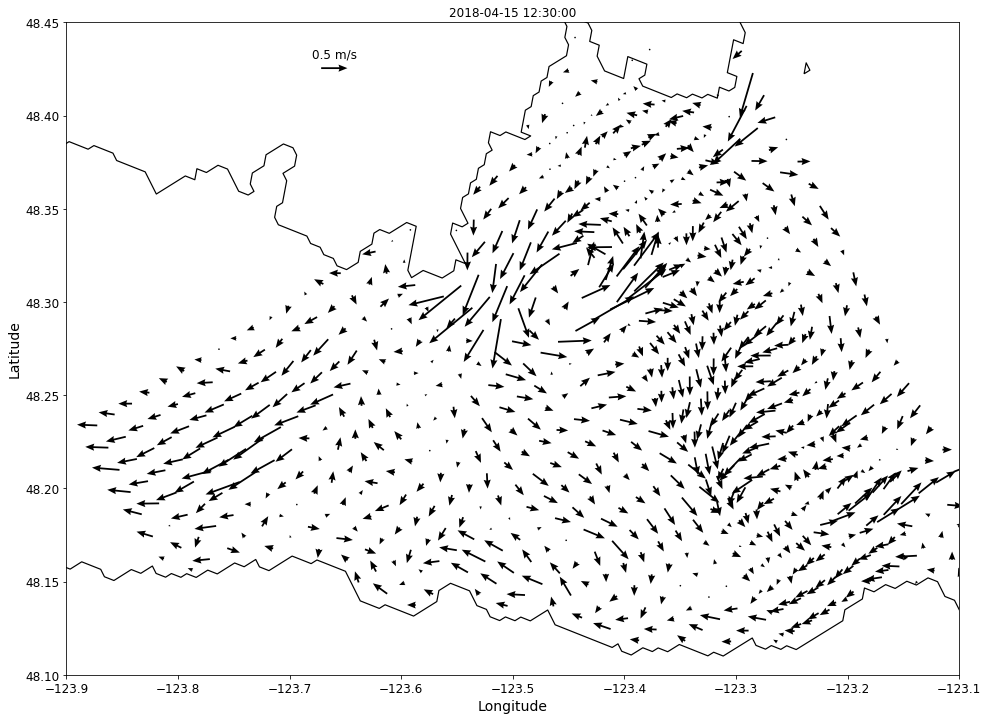

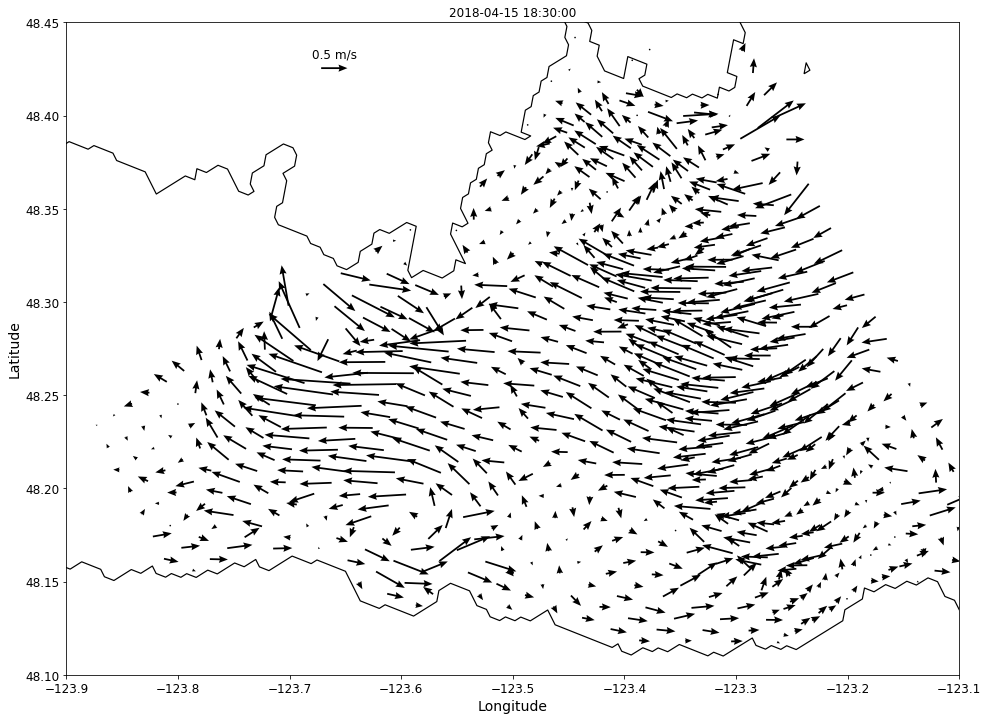

In [11]:
for n in np.arange(24,72,6):
    u = np.ma.masked_array(HS1u.variables['vozocrtx'][n,0,...], 
                        1-HS1mask.variables['tmask'][0,0,...])
    v = np.ma.masked_array(HS1v.variables['vomecrty'][n,0,...], 
                        1-HS1mask.variables['tmask'][0,0,...])
    ufull = np.ma.masked_array(coarseu.variables['vozocrtx'][n,0,...], 
                        1-mesh_mask.variables['tmask'][0,0,...])
    vfull = np.ma.masked_array(coarsev.variables['vomecrty'][n,0,...], 
                            1-mesh_mask.variables['tmask'][0,0,...])
    fig,ax2 = plt.subplots( figsize=(16,12))
    u, v = viz_tools.rotate_vel(u, v)
    ufull, vfull = viz_tools.rotate_vel(ufull, vfull)
    u, v = viz_tools.unstagger(np.expand_dims(u, 0), np.expand_dims(v, 0))
    ufull, vfull = viz_tools.unstagger(np.expand_dims(ufull, 0), 
                                       np.expand_dims(vfull, 0))
    Q=ax2.quiver(mesh_mask.variables['glamt'][0, 201:301:3, 101:201:3],
                 mesh_mask.variables['gphit'][0, 201:301:3, 101:201:3],
                 np.ma.masked_array(ufull[0,200:300:3, 100:200:3], 
            mask = 1 - mesh_mask.variables['tmask'][0,0, 201:301:3, 101:201:3]),
                np.ma.masked_array(vfull[0,200:300:3, 100:200:3], 
            mask = 1 - mesh_mask.variables['tmask'][0,0,201:301:3, 101:201:3]),
                 scale=17, width=0.002, headwidth=4)
    Q=ax2.quiver(HS1mask.variables['glamt'][0, 1:301:9, 1:101:9],
                 HS1mask.variables['gphit'][0, 1:301:9, 1:101:9],
                 np.ma.masked_array(u[0,:300:9, :100:9], 
                    mask = 1 - HS1mask.variables['tmask'][0,0,1:301:9, 1:101:9]), 
                 np.ma.masked_array(v[0,:300:9, :100:9], 
                    mask = 1 - HS1mask.variables['tmask'][0,0,1:301:9, 1:101:9]),
                 scale=17, width=0.002, headwidth=4)
    Q_key = plt.quiverkey(Q, 0.3, 0.93, 0.5, '0.5 m/s')
    viz_tools.plot_coastline(ax2, grid, coords = 'map')
    ax2.tick_params(labelsize=12)
    ax2.set_xlabel('Longitude', fontsize=14)
    ax2.set_ylabel('Latitude', fontsize=14)
    ax2.set_ylim(48.1, 48.45)
    ax2.set_xlim(-123.9, -123.1)
    ax2.set_title(nc.num2date(HS1u.variables['time_counter'][n],
                              HS1u.variables['time_counter'].units));

In [12]:
coarseu = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/18may18b/SalishSea_1h_20180518_20180521_grid_U.nc')
coarsev = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/18may18b/SalishSea_1h_20180518_20180521_grid_V.nc')
HS1u = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/18may18b/1_SalishSea_1h_20180518_20180521_grid_U.nc')
HS1v = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/18may18b/1_SalishSea_1h_20180518_20180521_grid_V.nc')

# May 19 - 20, 2018

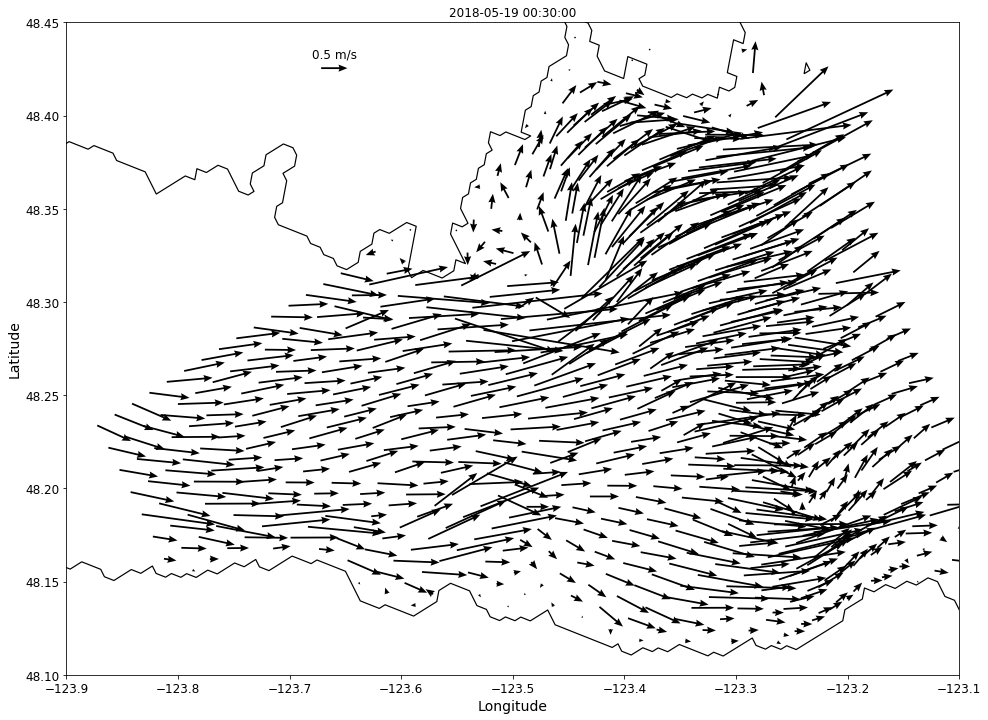

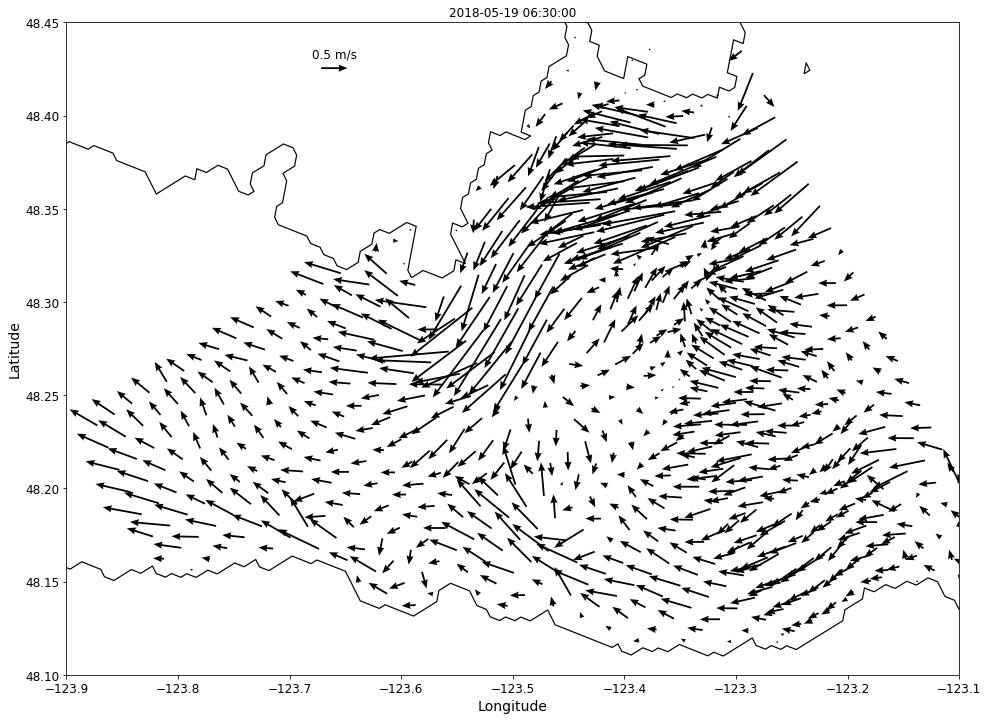

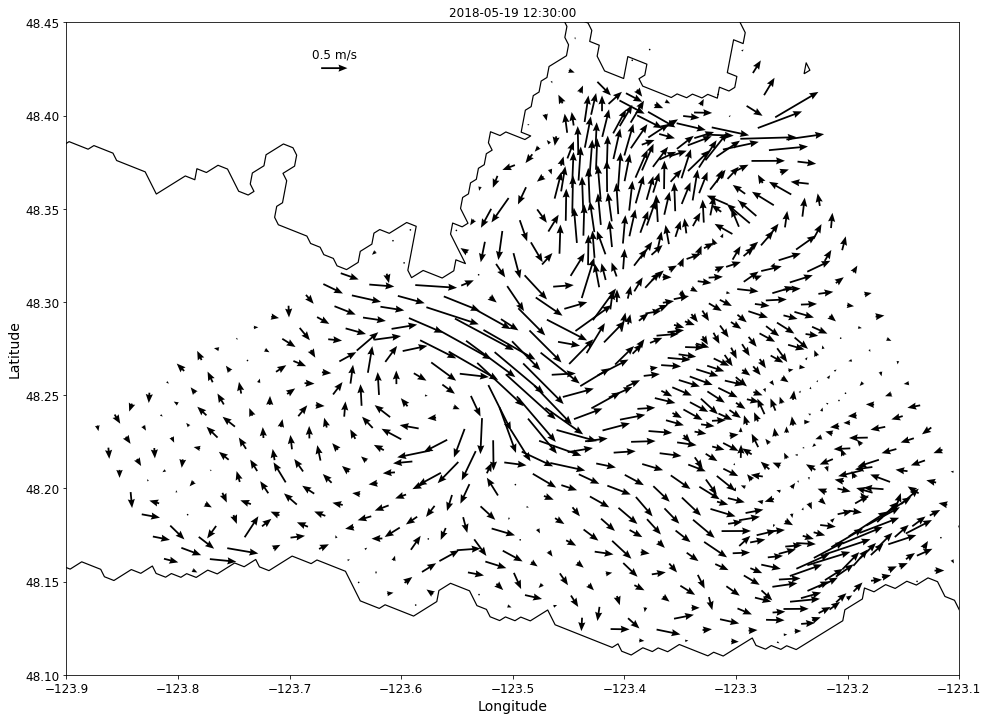

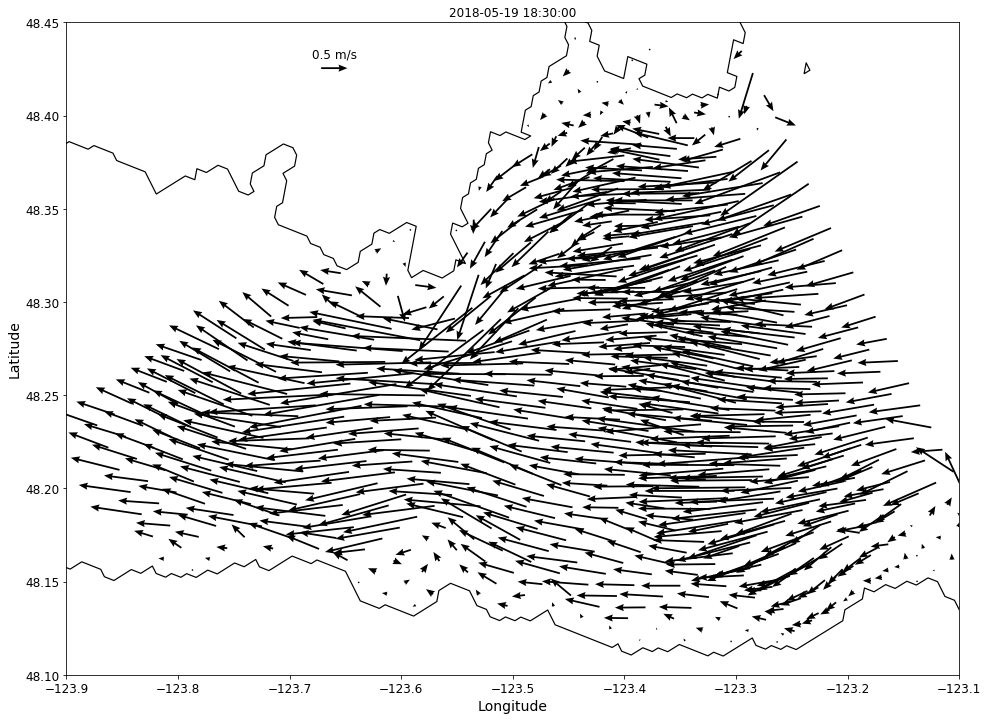

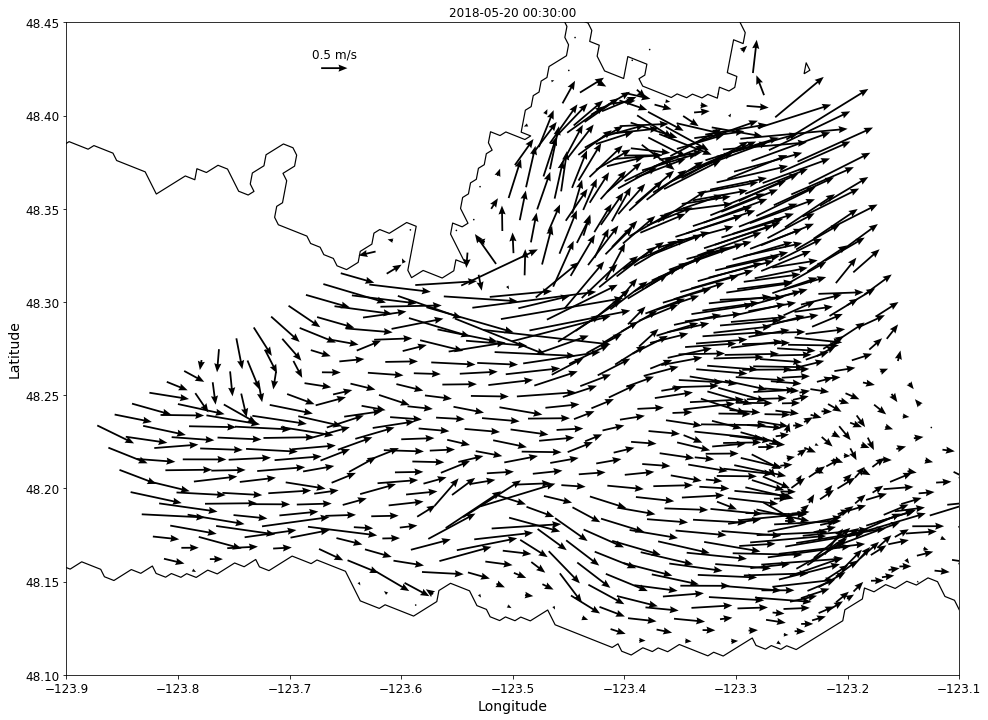

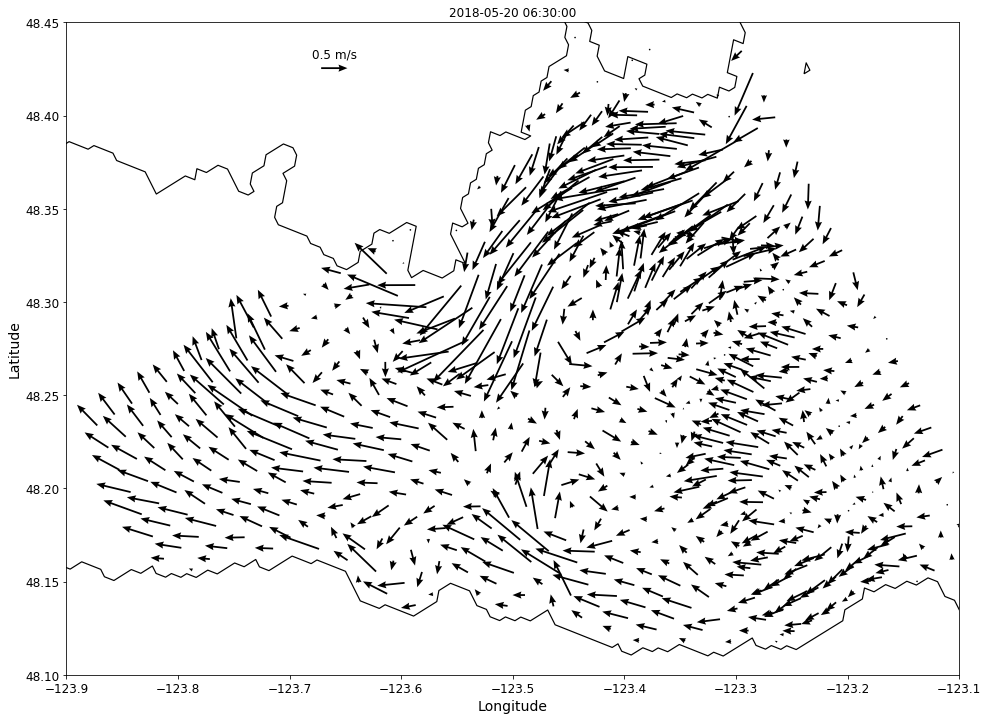

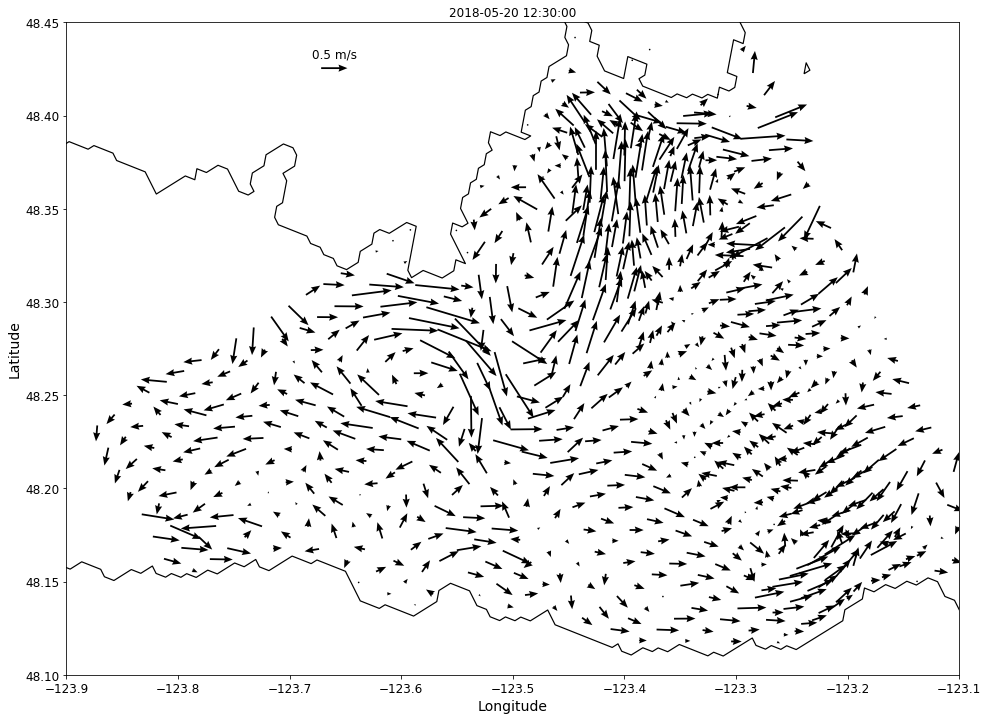

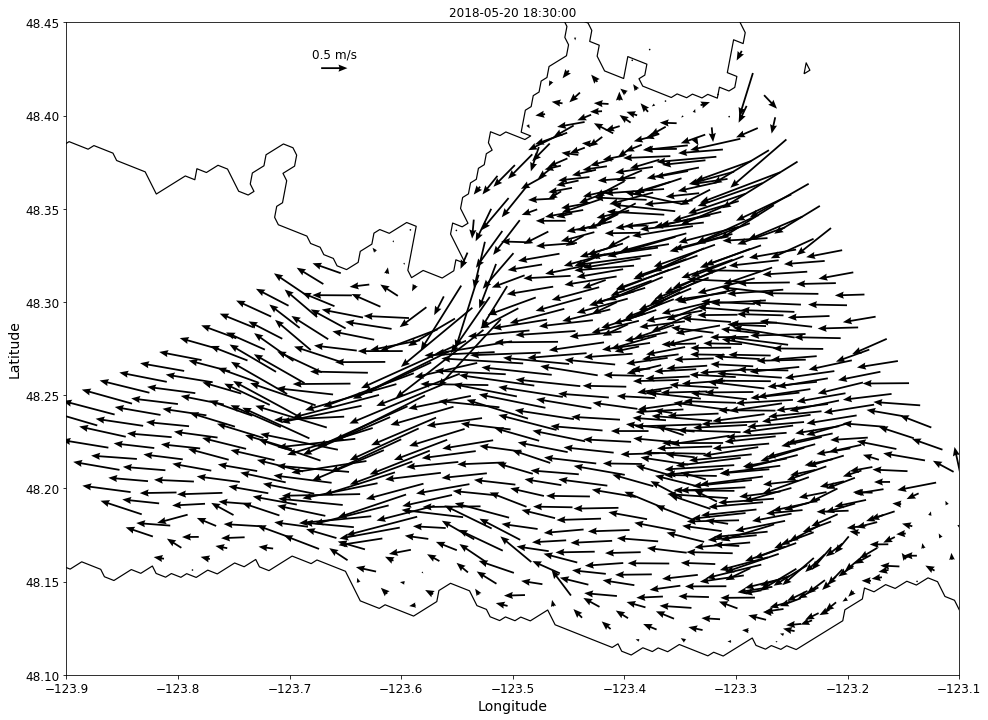

In [13]:
for n in np.arange(24,72,6):
    u = np.ma.masked_array(HS1u.variables['vozocrtx'][n,0,...], 
                        1-HS1mask.variables['tmask'][0,0,...])
    v = np.ma.masked_array(HS1v.variables['vomecrty'][n,0,...], 
                        1-HS1mask.variables['tmask'][0,0,...])
    ufull = np.ma.masked_array(coarseu.variables['vozocrtx'][n,0,...], 
                        1-mesh_mask.variables['tmask'][0,0,...])
    vfull = np.ma.masked_array(coarsev.variables['vomecrty'][n,0,...], 
                            1-mesh_mask.variables['tmask'][0,0,...])
    fig,ax2 = plt.subplots( figsize=(16,12))
    u, v = viz_tools.rotate_vel(u, v)
    ufull, vfull = viz_tools.rotate_vel(ufull, vfull)
    u, v = viz_tools.unstagger(np.expand_dims(u, 0), np.expand_dims(v, 0))
    ufull, vfull = viz_tools.unstagger(np.expand_dims(ufull, 0), 
                                       np.expand_dims(vfull, 0))
    Q=ax2.quiver(mesh_mask.variables['glamt'][0, 201:301:3, 101:201:3],
                 mesh_mask.variables['gphit'][0, 201:301:3, 101:201:3],
                 np.ma.masked_array(ufull[0,200:300:3, 100:200:3], 
            mask = 1 - mesh_mask.variables['tmask'][0,0, 201:301:3, 101:201:3]),
                np.ma.masked_array(vfull[0,200:300:3, 100:200:3], 
            mask = 1 - mesh_mask.variables['tmask'][0,0,201:301:3, 101:201:3]),
                 scale=17, width=0.002, headwidth=4)
    Q=ax2.quiver(HS1mask.variables['glamt'][0, 1:301:9, 1:101:9],
                 HS1mask.variables['gphit'][0, 1:301:9, 1:101:9],
                 np.ma.masked_array(u[0,:300:9, :100:9], 
                    mask = 1 - HS1mask.variables['tmask'][0,0,1:301:9, 1:101:9]), 
                 np.ma.masked_array(v[0,:300:9, :100:9], 
                    mask = 1 - HS1mask.variables['tmask'][0,0,1:301:9, 1:101:9]),
                 scale=17, width=0.002, headwidth=4)
    Q_key = plt.quiverkey(Q, 0.3, 0.93, 0.5, '0.5 m/s')
    viz_tools.plot_coastline(ax2, grid, coords = 'map')
    ax2.tick_params(labelsize=12)
    ax2.set_xlabel('Longitude', fontsize=14)
    ax2.set_ylabel('Latitude', fontsize=14)
    ax2.set_ylim(48.1, 48.45)
    ax2.set_xlim(-123.9, -123.1)
    ax2.set_title(nc.num2date(HS1u.variables['time_counter'][n],
                              HS1u.variables['time_counter'].units));

In [14]:
coarseu = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/25may18/SalishSea_1h_20180525_20180528_grid_U.nc')
coarsev = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/25may18/SalishSea_1h_20180525_20180528_grid_V.nc')
HS1u = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/25may18/1_SalishSea_1h_20180525_20180528_grid_U.nc')
HS1v = nc.Dataset('/data/vdo/MEOPAR/completed-runs/swiftsureAGRIF/25may18/1_SalishSea_1h_20180525_20180528_grid_V.nc')

# May 26 - 27, 2018

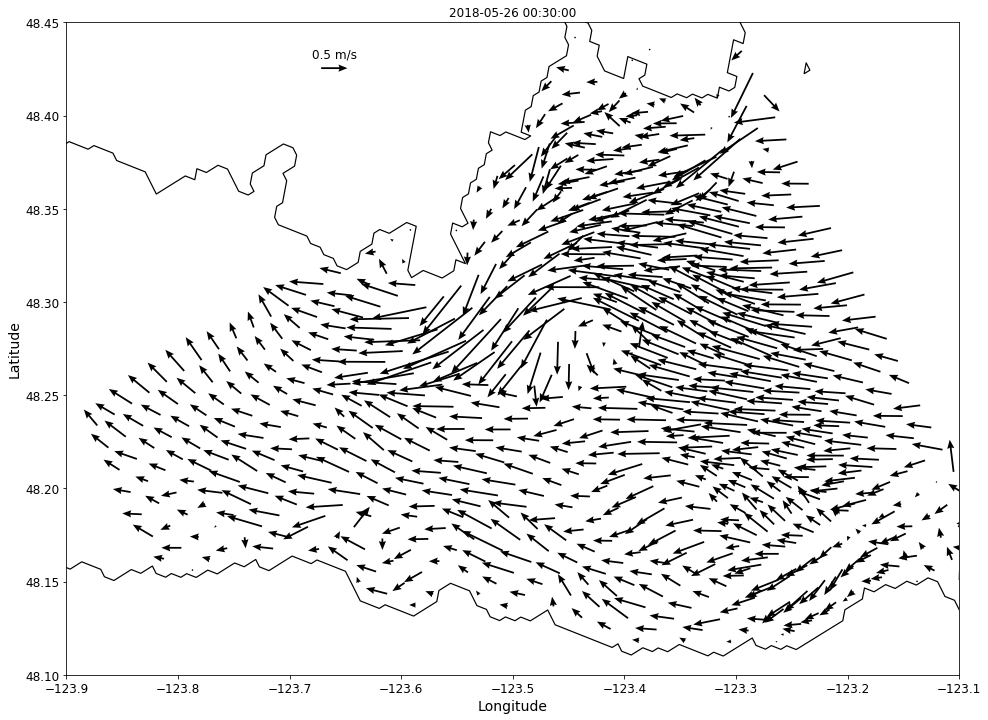

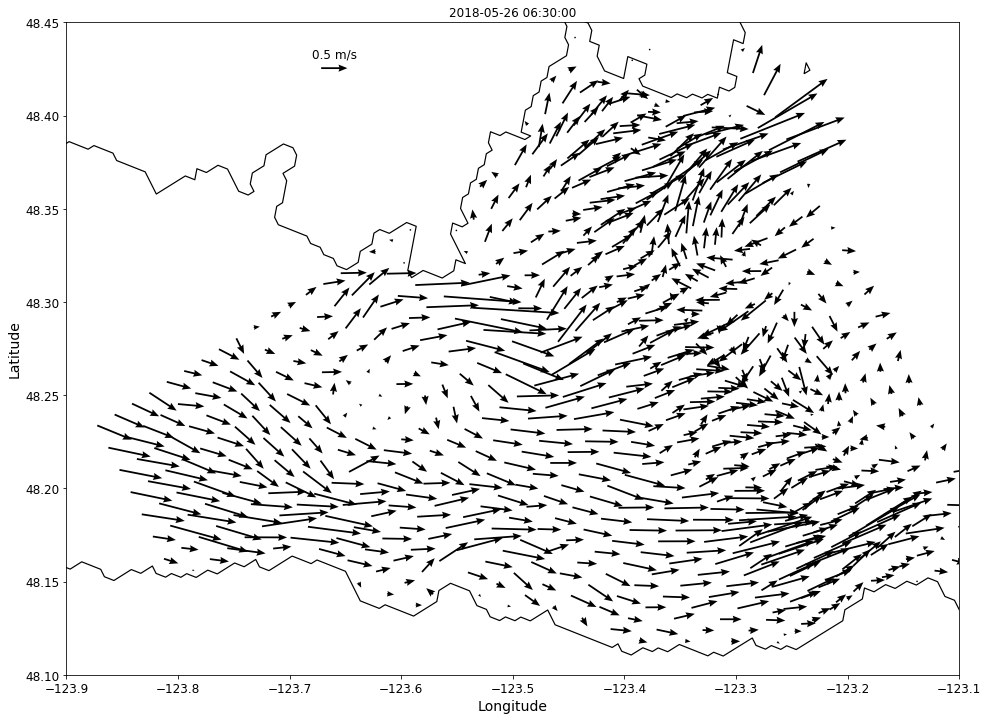

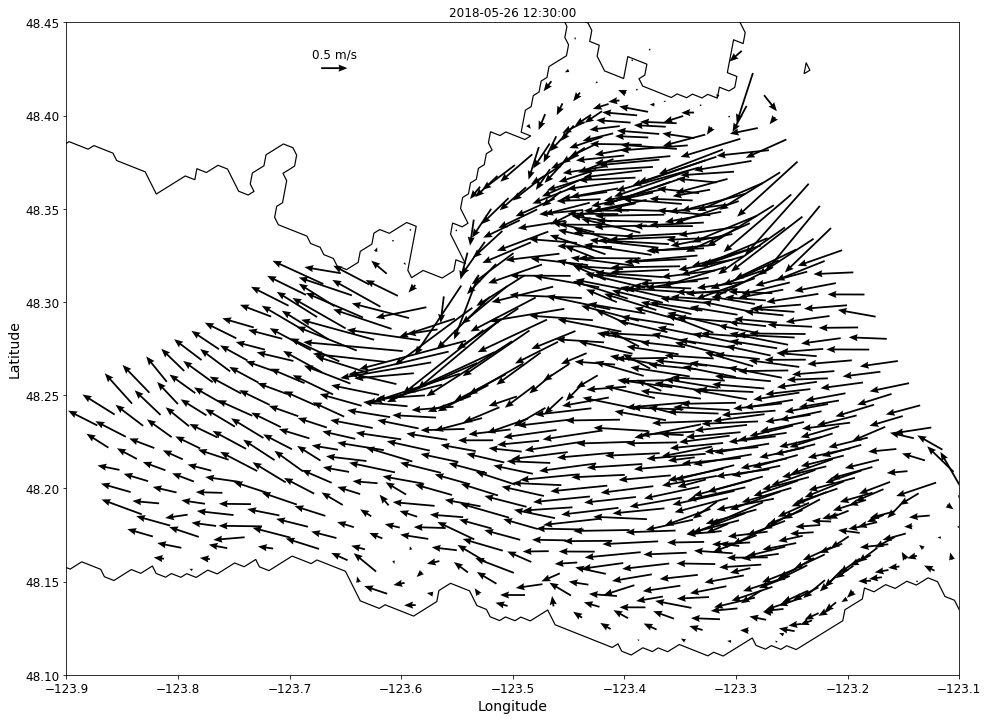

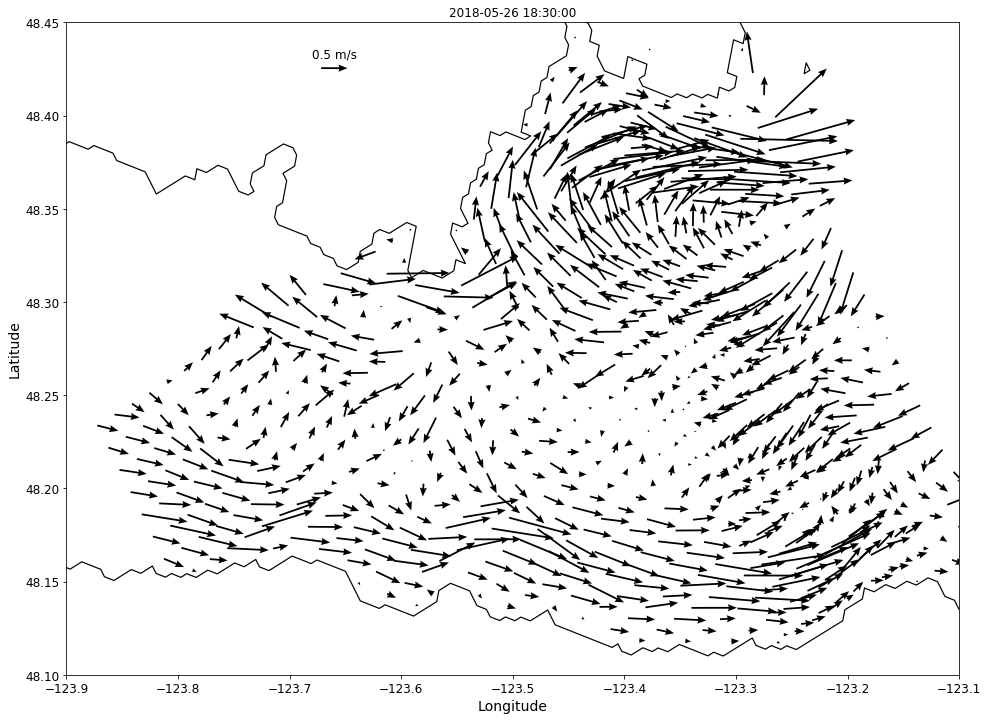

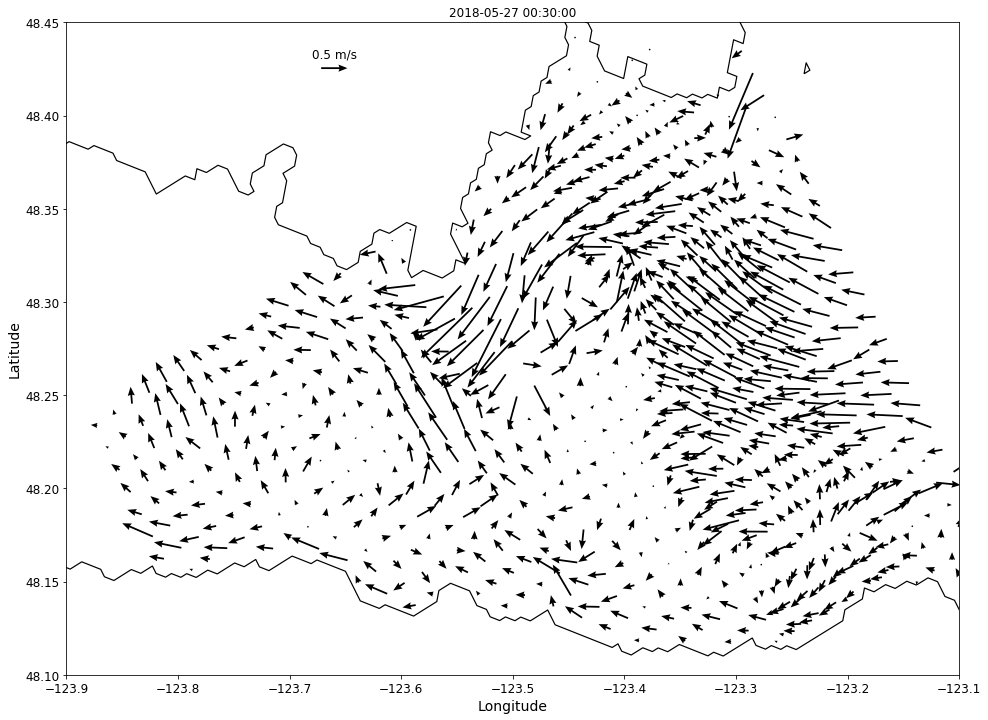

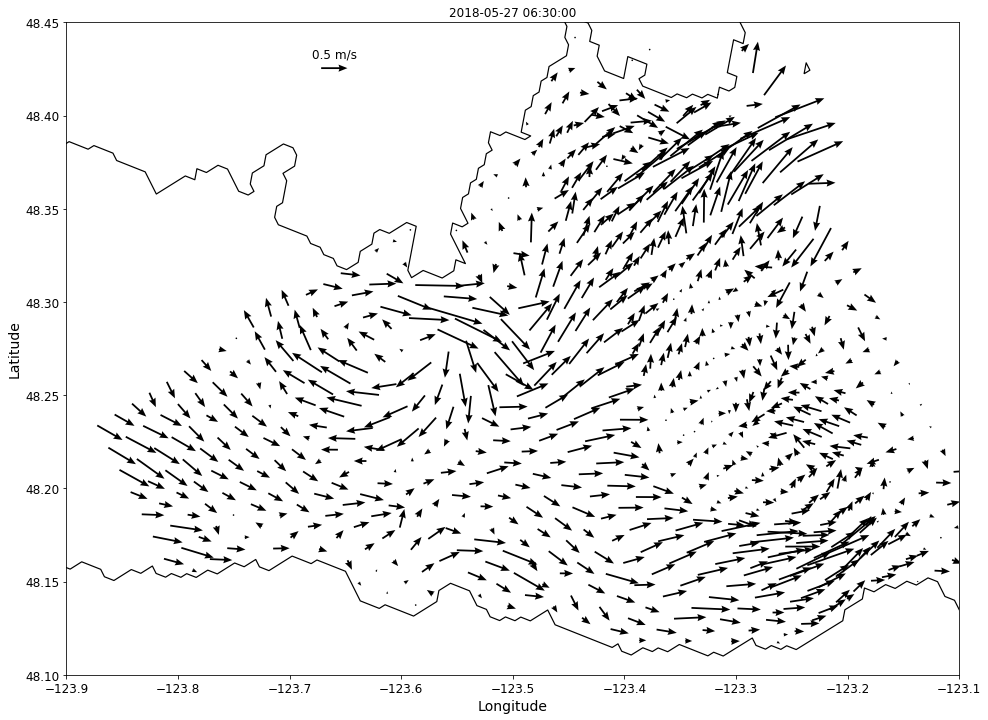

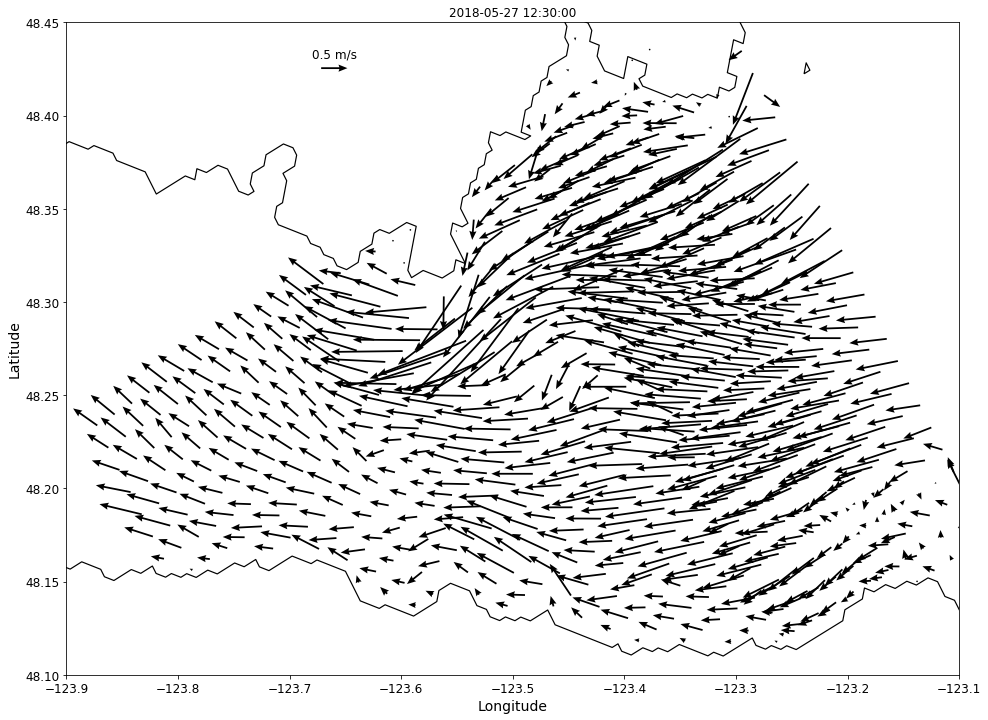

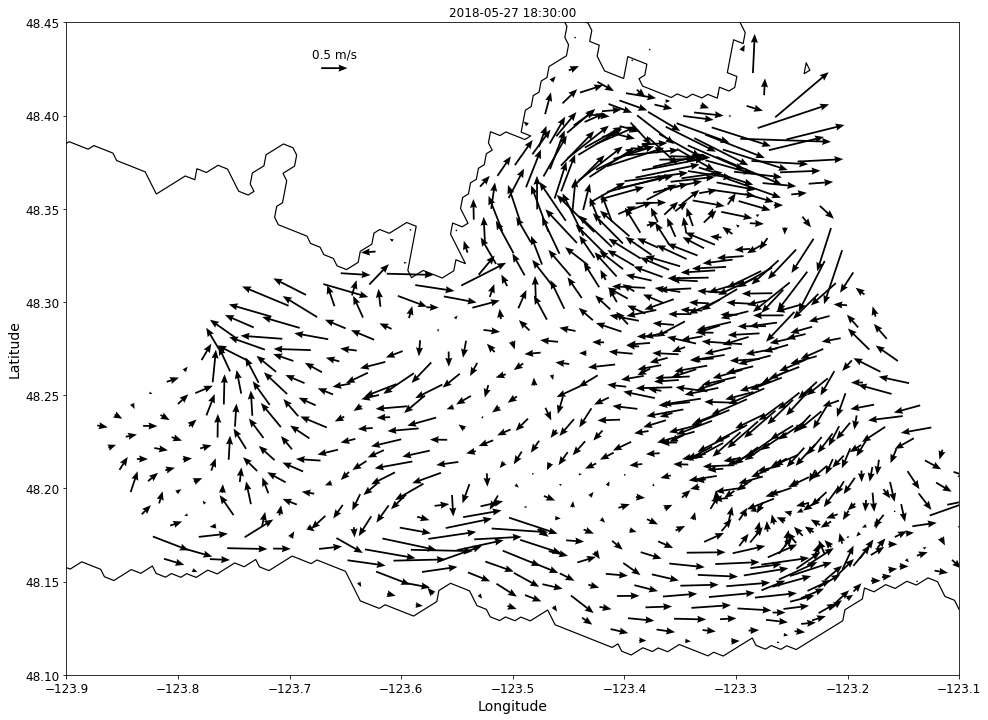

In [15]:
for n in np.arange(24,72,6):
    u = np.ma.masked_array(HS1u.variables['vozocrtx'][n,0,...], 
                        1-HS1mask.variables['tmask'][0,0,...])
    v = np.ma.masked_array(HS1v.variables['vomecrty'][n,0,...], 
                        1-HS1mask.variables['tmask'][0,0,...])
    ufull = np.ma.masked_array(coarseu.variables['vozocrtx'][n,0,...], 
                        1-mesh_mask.variables['tmask'][0,0,...])
    vfull = np.ma.masked_array(coarsev.variables['vomecrty'][n,0,...], 
                            1-mesh_mask.variables['tmask'][0,0,...])
    fig,ax2 = plt.subplots( figsize=(16,12))
    u, v = viz_tools.rotate_vel(u, v)
    ufull, vfull = viz_tools.rotate_vel(ufull, vfull)
    u, v = viz_tools.unstagger(np.expand_dims(u, 0), np.expand_dims(v, 0))
    ufull, vfull = viz_tools.unstagger(np.expand_dims(ufull, 0), 
                                       np.expand_dims(vfull, 0))
    Q=ax2.quiver(mesh_mask.variables['glamt'][0, 201:301:3, 101:201:3],
                 mesh_mask.variables['gphit'][0, 201:301:3, 101:201:3],
                 np.ma.masked_array(ufull[0,200:300:3, 100:200:3], 
            mask = 1 - mesh_mask.variables['tmask'][0,0, 201:301:3, 101:201:3]),
                np.ma.masked_array(vfull[0,200:300:3, 100:200:3], 
            mask = 1 - mesh_mask.variables['tmask'][0,0,201:301:3, 101:201:3]),
                 scale=17, width=0.002, headwidth=4)
    Q=ax2.quiver(HS1mask.variables['glamt'][0, 1:301:9, 1:101:9],
                 HS1mask.variables['gphit'][0, 1:301:9, 1:101:9],
                 np.ma.masked_array(u[0,:300:9, :100:9], 
                    mask = 1 - HS1mask.variables['tmask'][0,0,1:301:9, 1:101:9]), 
                 np.ma.masked_array(v[0,:300:9, :100:9], 
                    mask = 1 - HS1mask.variables['tmask'][0,0,1:301:9, 1:101:9]),
                 scale=17, width=0.002, headwidth=4)
    Q_key = plt.quiverkey(Q, 0.3, 0.93, 0.5, '0.5 m/s')
    viz_tools.plot_coastline(ax2, grid, coords = 'map')
    ax2.tick_params(labelsize=12)
    ax2.set_xlabel('Longitude', fontsize=14)
    ax2.set_ylabel('Latitude', fontsize=14)
    ax2.set_ylim(48.1, 48.45)
    ax2.set_xlim(-123.9, -123.1)
    ax2.set_title(nc.num2date(HS1u.variables['time_counter'][n],
                              HS1u.variables['time_counter'].units));